# Windturbines - Modelling and Control

![wind turbine](windturbine_photo.png "wind turbine")

source: Muller, S., Deicke, M., De Doncker, R.W. "Doubly Fed Induction Generator Systems for Wind Turbines". IEEE Industry Applications Magazine, May 2002. 

# AC generator - convert mechanical power into electrical power

Operating Priciple: A rotating magnetic field will induce (alternating) current in a coil of wire.




# Faraday's Law

Let:
- $\vec{\phi}$ be magnetic flux
- $e$ is voltage across wire
- $\vec{B}$ be magnetic flux density: $B = \vec{\phi}/A$
- $\ell$ is length of wire
- $\vec{v}$ is velocity of wire

The voltage induced in a coil of wire is equal to the negative of the rate of change of the magnetic flux enclosed by the coil:
$$
e = -\frac{\text{d}\phi}{\text{d}t}
$$
In this formula, magnetic flux is assumed to be perpendicular to the surface enclosed by the coil. 

Alternatively, moving a conductor through a magnetic field will induce a voltage in the conductor:
$$
e = (\vec{v} \times \vec{B}) \cdot \ell
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as manimation

In [3]:
def plot_windings(ax, theta_m, theta_r=0, radius=5, is_rotor=False, add_arrows=True):
    theta_m = theta_m/180*np.pi
    theta_r = theta_r/180*np.pi

    rotor = patches.Circle((0,0), radius=radius, edgecolor='black', facecolor='none')   
    wire_a_in = patches.Circle(((radius+0.5)*np.cos(theta_r),(radius+0.5)*np.sin(theta_r)), radius=0.5, edgecolor='black', facecolor='red')
    wire_a_out = patches.Circle(((radius+0.5)*np.cos(theta_r+np.pi),(radius+0.5)*np.sin(theta_r+np.pi)), radius=0.5, edgecolor='black', facecolor='red')
    wire_b_in = patches.Circle(((radius+0.5)*np.cos(theta_r+60/180*np.pi),(radius+0.5)*np.sin(theta_r+60/180*np.pi)), radius=0.5, edgecolor='black', facecolor='blue')
    wire_b_out = patches.Circle(((radius+0.5)*np.cos(theta_r+240/180*np.pi),(radius+0.5)*np.sin(theta_r+240/180*np.pi)), radius=0.5, edgecolor='black', facecolor='blue')
    wire_c_in = patches.Circle(((radius+0.5)*np.cos(theta_r+120/180*np.pi),(radius+0.5)*np.sin(theta_r+120/180*np.pi)), radius=0.5, edgecolor='black', facecolor='green')
    wire_c_out = patches.Circle(((radius+0.5)*np.cos(theta_r+300/180*np.pi),(radius+0.5)*np.sin(theta_r+300/180*np.pi)), radius=0.5, edgecolor='black', facecolor='green')

    ax.add_patch(rotor)
    ax.add_patch(wire_a_in)
    ax.add_patch(wire_a_out)
    ax.add_patch(wire_b_in)
    ax.add_patch(wire_b_out)
    ax.add_patch(wire_c_in)
    ax.add_patch(wire_c_out)

    ax.plot([(radius+0.5)*np.cos(theta_r+60/180*np.pi),(radius+0.5)*np.cos(theta_r+240/180*np.pi)],[(radius+0.5)*np.sin(theta_r+60/180*np.pi),(radius+0.5)*np.sin(theta_r+240/180*np.pi)],'b--',alpha=0.5)
    ax.plot([(radius+0.5)*np.cos(theta_r+np.pi),(radius+0.5)*np.cos(theta_r)],[(radius+0.5)*np.sin(theta_r+np.pi),(radius+0.5)*np.sin(theta_r)],'r--',alpha=0.5)
    ax.plot([(radius+0.5)*np.cos(theta_r+120/180*np.pi),(radius+0.5)*np.cos(theta_r+300/180*np.pi)],[(radius+0.5)*np.sin(theta_r+120/180*np.pi),(radius+0.5)*np.sin(theta_r+300/180*np.pi)],'g--',alpha=0.5)

    if is_rotor:
        ax.plot([-radius*np.cos(theta_r), radius*np.cos(theta_r)], [-radius*np.sin(theta_r), radius*np.sin(theta_r)])


    if add_arrows:
        theta = theta_m+theta_r
        label_space = 1.05
        ax.arrow(0,0,r*np.cos(theta),r*np.sin(theta),width=0.1,length_includes_head=True)
        ax.text(label_space*r*np.cos(theta),label_space*r*np.sin(theta),r'$\vec{B}$')

        ra = r*np.sin(theta_m)
        ax.arrow(0,0,ra*np.cos(theta_r+np.pi/2),ra*np.sin(theta_r+np.pi/2),width=0.1,length_includes_head=True,color='red')
        ax.text(label_space*ra*np.cos(theta_r+np.pi/2),label_space*ra*np.sin(theta_r+np.pi/2),r'$\vec{B}_r$', color='red')
        
        rb = r*np.sin(theta_m-120/180*np.pi)
        ax.arrow(0,0,rb*np.cos(theta_r+2*np.pi/3+np.pi/2),rb*np.sin(theta_r+2*np.pi/3+np.pi/2),width=0.1,length_includes_head=True,color='green')
        ax.text(label_space*rb*np.cos(theta_r+2*np.pi/3+np.pi/2),label_space*rb*np.sin(theta_r+2*np.pi/3+np.pi/2),r'$\vec{B}_g$', color='green')

        rc = r*np.sin(theta_m+120/180*np.pi)
        ax.arrow(0,0,rc*np.cos(theta_r-2*np.pi/3+np.pi/2),rc*np.sin(theta_r-2*np.pi/3+np.pi/2),width=0.1,length_includes_head=True,color='blue')
        ax.text(label_space*rc*np.cos(theta_r-2*np.pi/3+np.pi/2),label_space*rc*np.sin(theta_r-2*np.pi/3+np.pi/2),r'$\vec{B}_b$', color='blue')


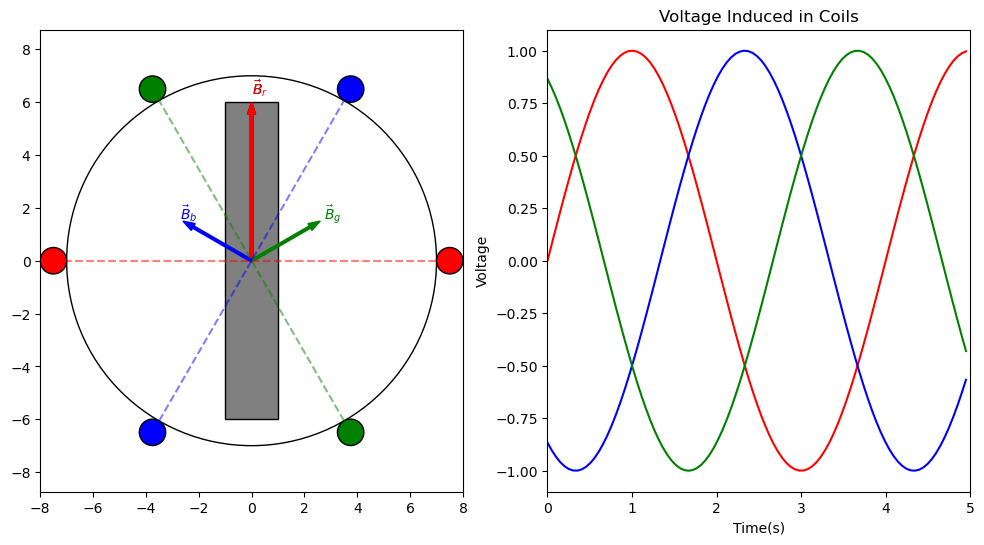

In [6]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='AC Machine with PM', artist='Matplotlib',
                comment='AC Machine with PM')
writer = FFMpegWriter(fps=5, metadata=metadata)

fig,ax=plt.subplots(1,2,figsize=(12,6))

r = 6

num_frames = 100
f = 1/4
t_end=5
t = np.linspace(0,t_end,num_frames)
omega_t_vec = 360*f*t
cnt = 0

ea = np.sin(omega_t_vec/180*np.pi)
eb = np.sin(omega_t_vec/180*np.pi - 120/180*np.pi)
ec = np.sin(omega_t_vec/180*np.pi + 120/180*np.pi)


with writer.saving(fig, "windturbinePM.mp4", num_frames):
    for theta in omega_t_vec: 
        ax[0].clear()
        ax[1].clear()
        
        rotor = patches.Rectangle((-r,-1), 2*r, 2, angle=theta, edgecolor='black', facecolor='gray',rotation_point='center')

        ax[0].add_patch(rotor)
        plot_windings(ax[0],theta,radius=r+1)

        ax[0].axis('equal')
        ax[0].set_xlim(-8,8)
        ax[0].set_ylim(-8,8)

        ax[1].plot(t[0:cnt],ea[0:cnt],'red')
        ax[1].plot(t[0:cnt],eb[0:cnt],'blue')
        ax[1].plot(t[0:cnt],ec[0:cnt],'green')
        ax[1].set_xlim([0,t_end])
        ax[1].set_xlabel('Time(s)')
        ax[1].set_title('Voltage Induced in Coils')
        ax[1].set_ylabel('Voltage')
        cnt+=1
        
        writer.grab_frame()




# Add photo of real stator + rotor

In [1]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="windturbinePM.mp4" type="video/mp4">
</video></div>""")

# In Equations

Consider a magnet rotating as shown in video. Let $\vec{B}$ denote magnetic flux density, and express it as a vector:
$$
\begin{align*}
\vec{B} &= B\angle (\omega t) \\
&= B \cos(\omega t)\hat{i} + B \sin(\omega t) \hat{j}
\end{align*}
$$
where $\omega$ is angular velocity of magnet, $\hat{i}$ and $\hat{j}$ are unit vectors in the x and y direction respectively. 




# Red Coil

Magnitude of magnetic flux density perpendicular to red coil ($\vec{B}$ projected onto the vector orthogonal to the plane of the red coil):
$$
\vec{B}_r = B \sin(\omega t)\angle 90 
$$
Total flux through red coil: 
$$
\vec{\phi}_r = \vec{B}_rA = r\ell\vec{B}_r
$$

Then, from Faraday's Law we have that the voltage induced in the red coil is:
$$
\begin{align*}
e_r &= -\frac{\text{d}\phi_r}{\text{d}t} \\
&= -\frac{\text{d}}{\text{d}t} r\ell B \sin(\omega t) \\
&= - r \ell B \omega \cos(\omega t)
\end{align*}

# Green Coil

INCLUDE DIAGRAM

Magnitude of magnetic flux density perpendicular to green coil:
$$
\vec{B}_g = B \sin(\omega t-\frac{2\pi}{3}) \angle 210
$$

Then, from Faraday's Law we have that the voltage incuded in the green coil is:
$$
\begin{align*}
e_g &= -\frac{\text{d}\phi_g}{\text{d}t} \\
&= -\frac{\text{d}}{\text{d}t} r\ell B \sin(\omega t-\frac{2\pi}{3}) \\
&= -r \ell B \omega \cos(\omega t-\frac{2\pi}{3})
\end{align*}

# Blue Coil

INCLUDE DIAGRMA

Magnitude of magnetic flux density perpendicular to blue coil:
$$
B_b = B \sin(\omega t+\frac{2\pi}{3}) \angle 330
$$

Then, from Faraday's Law we have that the voltage incuded in the blue coil is:
$$
\begin{align*}
e_b &= -\frac{\text{d}\phi_b}{\text{d}t} \\
&= -\frac{\text{d}}{\text{d}t} r\ell B \sin(\omega t+\frac{2\pi}{3}) \\
&= -r \ell B \omega \cos(\omega t+\frac{2\pi}{3})
\end{align*}

# Direct In-Line Wind Turbine

Note that the frequency of the produced voltage/current is the same as the mechanical frequency of rotation of the rotor.

When connected to the grid, need electrical frequency to be $60$ Hz. 

Problem: wind turbine will change rotational speed depending on the wind.

Solution:
Convert AC (at mechanical frequency of rotor) to DC, then convert DC into AC with frequency $60$ Hz and grid voltage. 

![wind turbine](directlyconnected.png "wind turbine")

source: Muller, S., Deicke, M., De Doncker, R.W. "Doubly Fed Induction Generator Systems for Wind Turbines". IEEE Industry Applications Magazine, May 2002. 

Problem:
All the power generated by the wind turbin passes through the AC-DC and DC-AC converters. This results in large and expensive power electronics.

# Ampere's Law

Interesting fact: In the previous reasoning, I selected rotation of the magnetic field as the input and induced voltage in the coils as the output. However, we can also select voltages in the coils as the inputs, and the induced magnetic field as the output. This is a variation of Ampere's Law.

Ampere's Law:
$$
\phi(t) = \frac{N}{\mathcal{R}} i(t)
$$
where:
- $\phi$ is magnetic flux through a coil (it is a vector perpendicular to the surface of the coil)
- $N$ is the number of turns in the coil
- $\mathcal{R}$ is the reluctance
- $i(t)$ is the current in the coil



By applying alternating 3-phase current to the 3 coils, a rotating magnetic field can be produced:
$$
\begin{align*}
\vec{\phi_r}(t) &= \frac{N}{\mathcal{R}}i_r(t)\angle 90 \\
&=\frac{N}{\mathcal{R}}\sin(\omega t)\angle 90 \\
&=\frac{N}{\mathcal{R}}\sin(\omega t)\hat{j} \\
\vec{\phi_g}(t)&= \frac{N}{\mathcal{R}}i_g(t)\angle 210  \\
&=\frac{N}{\mathcal{R}}\sin(\omega t-\frac{2\pi}{3})\angle 210 \\
&=\frac{N}{\mathcal{R}}\sin(\omega t-\frac{2\pi}{3})(-\cos(\pi/6)\hat{i}-\sin(\pi/6)\hat{j} )\\
\vec{\phi_b}(t)&= \frac{N}{\mathcal{R}}i_b(t) \angle 330\\
&=\frac{N}{\mathcal{R}}\sin(\omega t+\frac{2\pi}{3})\angle 330 \\
&=\frac{N}{\mathcal{R}}\sin(\omega t+\frac{2\pi}{3})(\cos(\pi/6)\hat{i}-\sin(\pi/6)\hat{j} )
\end{align*}
$$


Adding induced magnetic fields together results in (after some trigonometry):
$$
\begin{align*}
\vec{\phi}_r(t) + \vec{\phi}_g(t) + \vec{\phi}_b(t) &= \frac{3}{2}\frac{N}{\mathcal{R}}\cos(\omega t)\hat{i} + \frac{3}{2}\frac{N}{\mathcal{R}}\sin(\omega t)\hat{j}\\
&= \frac{3}{2}\frac{N}{\mathcal{R}}\angle \omega t
\end{align*}
$$

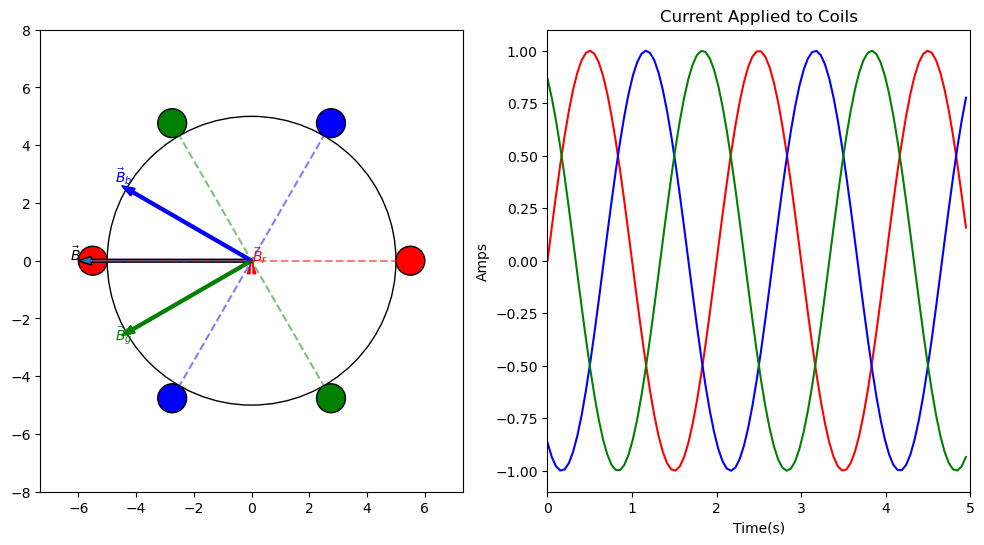

In [11]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='AC Machine stator', artist='Matplotlib',
                comment='AC Machine stator')
writer = FFMpegWriter(fps=5, metadata=metadata)

fig,ax=plt.subplots(1,2,figsize=(12,6))

r = 6


num_frames = 100
f = 1/2
t_end=5
t = np.linspace(0,t_end,num_frames)
omega_t_vec = 360*f*t
cnt = 0

ea = np.sin(omega_t_vec/180*np.pi)
eb = np.sin(omega_t_vec/180*np.pi - 120/180*np.pi)
ec = np.sin(omega_t_vec/180*np.pi + 120/180*np.pi)


with writer.saving(fig, "stator.mp4", num_frames):
    for theta in omega_t_vec: 
        ax[0].clear()
        ax[1].clear()
        
        plot_windings(ax[0],theta)
        ax[0].axis('equal')
        ax[0].set_xlim(-8,8)
        ax[0].set_ylim(-8,8)

        ax[1].plot(t[0:cnt],ea[0:cnt],'red')
        ax[1].plot(t[0:cnt],eb[0:cnt],'blue')
        ax[1].plot(t[0:cnt],ec[0:cnt],'green')
        ax[1].set_xlim([0,t_end])
        ax[1].set_xlabel('Time(s)')
        ax[1].set_title('Current Applied to Coils')
        ax[1].set_ylabel('Amps')
        cnt+=1
        
        writer.grab_frame()




In [2]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="stator.mp4" type="video/mp4">
</video></div>""")

# Doubly Fed Induction Generator

This principle leads to the so called *Doubly Fed Induction Generator*. Most modern wind turbines have this design.

![wind turbine](dfig.png "wind turbine")

source: Muller, S., Deicke, M., De Doncker, R.W. "Doubly Fed Induction Generator Systems for Wind Turbines". IEEE Industry Applications Magazine, May 2002. 

Observations:
- Stator is directly connected to grid
- Rotor is also connected to grid, but through AC-DC and DC-AC converters
- Power can flow from stator to grid, and sometimes from rotor to grid. This means that only a small portion of the power flows through the power electronics, which in turn means that the power electronics can be much smaller and cheaper.

Question:
- The frequency of the grid if 60Hz, what is the rotor is not spinning at exactly 60Hz?


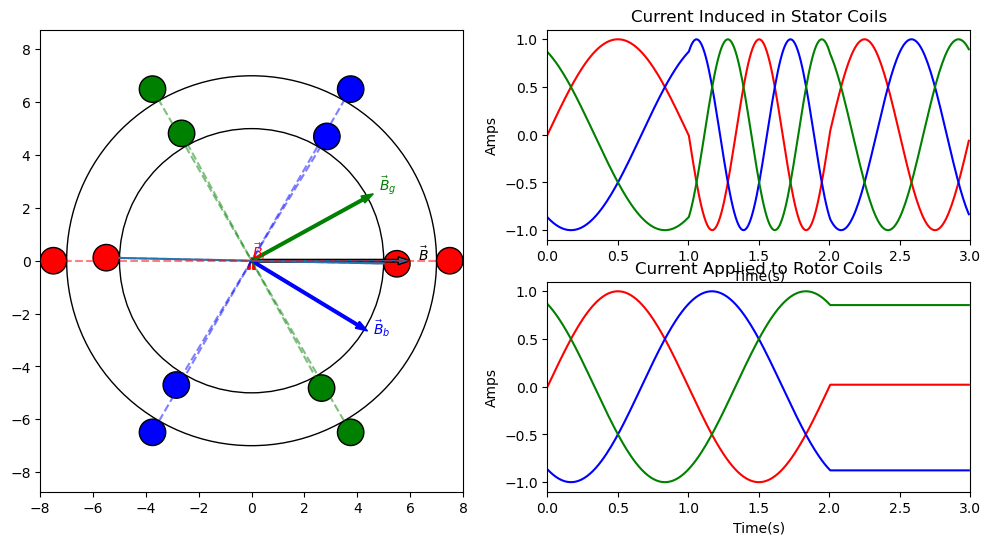

In [18]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='DFIG', artist='Matplotlib',
                comment='DFIG')
writer = FFMpegWriter(fps=5, metadata=metadata)

fig=plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,4)
ax = [ax1, ax2, ax3]

r = 6

num_frames = 300
f_r = 1
t_end=3
t = np.linspace(0,t_end,num_frames)
omega_r_t_vec = np.concatenate((np.zeros(int(num_frames/3)),360*f_r*t[0:int(2*num_frames/3)]))

f_m = 0.5
omega_m_t_vec = np.concatenate((360*f_m*t[0:int(2*num_frames/3)],360*f_m*t[int(2*num_frames/3)]*np.ones(int(num_frames/3))))
cnt = 0

es_a = np.sin((omega_m_t_vec+omega_r_t_vec)/180*np.pi)
es_b = np.sin(omega_m_t_vec/180*np.pi+omega_r_t_vec/180*np.pi - 120/180*np.pi)
es_c = np.sin(omega_m_t_vec/180*np.pi+omega_r_t_vec/180*np.pi + 120/180*np.pi)

er_a = np.sin(omega_m_t_vec/180*np.pi)
er_b = np.sin(omega_m_t_vec/180*np.pi - 120/180*np.pi)
er_c = np.sin(omega_m_t_vec/180*np.pi + 120/180*np.pi)

with writer.saving(fig, "dfig.mp4", num_frames):
    for theta in omega_r_t_vec: 
        ax[0].clear()
        ax[1].clear()
        ax[2].clear()

        plot_windings(ax[0],theta_m=omega_m_t_vec[cnt], theta_r=theta, is_rotor=True)
        plot_windings(ax[0],theta_m=0, radius=7, add_arrows=False)        

        ax[0].axis('equal')
        ax[0].set_xlim(-8,8)
        ax[0].set_ylim(-8,8)

        ax[1].plot(t[0:cnt],es_a[0:cnt],'red')
        ax[1].plot(t[0:cnt],es_b[0:cnt],'blue')
        ax[1].plot(t[0:cnt],es_c[0:cnt],'green')
        ax[1].set_xlim([0,t_end])
        ax[1].set_xlabel('Time(s)')
        ax[1].set_title('Current Induced in Stator Coils')
        ax[1].set_ylabel('Amps')


        ax[2].plot(t[0:cnt],er_a[0:cnt],'red')
        ax[2].plot(t[0:cnt],er_b[0:cnt],'blue')
        ax[2].plot(t[0:cnt],er_c[0:cnt],'green')
        ax[2].set_xlim([0,t_end])
        ax[2].set_xlabel('Time(s)')
        ax[2].set_title('Current Applied to Rotor Coils')
        ax[2].set_ylabel('Amps')

        cnt+=1
        
        writer.grab_frame()




In [1]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="dfig.mp4" type="video/mp4">
</video></div>""")

# Observations

- When rotor is not spinning, frequency of current in rotor and stator windings is the same.
- When rotor starts spinning, rotational speed of the magnetic field increases, so frequency of current induced in stator windings increases.
- When DC current applied to rotor, frequency of current induced in stator windings is equal to the rotational speed of the rotor.

# Strategy for Keeping Stator Frequency Constant

- When rotor is spinning slower than $60$ Hz, apply current to rotor windings to speed up electromagnetic field.
- When rotor is spinning faster than $60$ Hz, draw current from rotor windings to slow down electromagnetic field.

# Doubly Feb Induction Generator

![wind turbine](dfig.png "wind turbine")

source: Muller, S., Deicke, M., De Doncker, R.W. "Doubly Fed Induction Generator Systems for Wind Turbines". IEEE Industry Applications Magazine, May 2002. 

- Both stator and rotor are connected to grid.
- A magnetic field is generated by windings of the stator, and the windings of the rotor.
- The stator is directly connected to the grid, and so voltage and frequency in the stator must/will oscillate at the voltage and frequency of the grid.
- Power is injected into the grid by generating current in the windings of the stator. 


# Total Megnetic Flux

The total flux induced by the 3-phase alternating current in the rotor is:
$$
\vec{\phi}_r = \vec{\phi_{ra}} + \vec{\phi_{rb}} + \vec{\phi_{rc}}
$$

The total flux induced by the 3-phase alternating current in the stator is:
$$
\vec{\phi}_s = \vec{\phi_{sa}} + \vec{\phi_{sb}} + \vec{\phi_{sc}}
$$

The total flux in the air gap between the stator and the rotor is the sum of both fluxes.

On the stator side of the air gap the total magnetic flux is:
$$
\vec{\phi}_S = \vec{\phi}_s + \kappa \vec{\phi}_r
$$
where $\kappa$ is a leakage term due to the air gap between the rotor and the stator.

On the rotor side of the air gap, the total magnetic flux is:
$$
\vec{\phi}_R = \vec{\phi}_r + \kappa \vec{\phi}_s
$$
where $\kappa$ is the same leakage term, but working in the opposite direction (from stator to rotor).

# Circuit diagram of rotor and stator

![generator](circuit_diagram.png "generator")

From the circuit diagram we have:
$$
\begin{align*}
v_a^s &= R_s i_a^s + \frac{\text{d}\phi_a^s}{\text{d}t} \\
v_b^s &= R_s i_b^s + \frac{\text{d}\phi_b^s}{\text{d}t} \\
v_c^s &= R_s i_c^s + \frac{\text{d}\phi_c^s}{\text{d}t} \\
v_a^r &= R_r i_a^r + \frac{\text{d}\phi_a^r}{\text{d}t} \\
v_b^r &= R_r i_b^r + \frac{\text{d}\phi_b^r}{\text{d}t} \\
v_c^r &= R_r i_c^r + \frac{\text{d}\phi_c^r}{\text{d}t} 
\end{align*}
$$

Which we can write as a vector:
$$
\begin{align*}
\vec{v}_s &= R_s \vec{i}_s + \frac{\text{d}\vec{\phi}_S}{\text{d}t} \\
\vec{v}_r &= R_r \vec{i}_r + \frac{\text{d}\vec{\phi}_R}{\text{d}t} 
\end{align*}
$$
where 
$$
\begin{align*}
\vec{v} &= v_a\angle 0 + v_b \angle 120 + v_c \angle 240 \\
\vec{i} &= i_a\angle 0 + i_b \angle 120 + i_c \angle 240 
\end{align*}
$$

# In summary

All the equations we have for our model are:
$$
\begin{align*}
\vec{v}_s &= R_s \vec{i}_s + \frac{\text{d}\vec{\phi}_S}{\text{d}t} \\
\vec{v}_r &= R_r \vec{i}_r + \frac{\text{d}\vec{\phi}_R}{\text{d}t} \\
\vec{\phi}_S &= \vec{\phi}_s + \kappa \vec{\phi}_r \\
\vec{\phi}_R &= \vec{\phi}_r + \kappa \vec{\phi}_s \\
\vec{\phi}_s &= L_s \vec{i}_s \\
\vec{\phi}_r &= L_r \vec{i}_r
\end{align*}
$$
This model describes all the voltages and currents in the generator. 

# Connecting generator to shaft

- We have a model for the generator dynamics
- We have a model for the turbine blades and shaft
- Need to connect them together!

Torque equation:
$$
J \frac{\text{d}^2\theta_b}{\text{d}t} = T_m - T_e + k\theta_r - k \theta_b - b \frac{\text{d} \theta_b}{\text{dt}}
$$
where 
- $T_m$ is mechanical torque coming from the turbine shaft (i.e. torque caused by the wind)
- $T_e$ is electrical torque due to electromagnetic field
- $\theta_b$ is angular position of blades
- $\theta_r$ is angular position of rotor


# Electrical Torque

Generating a current in the stator will result in a force that opposes motion of the rotor.

Another version of Ampere and Faraday's Laws:
$$
\vec{F} = i(\vec{\ell} \times \vec{B})
$$
where 
- $F$ is force, 
- $i$ is current, 
- $\ell$ is the length of the wire, 
- $\vec{B}$ is the magnetic flux density

And Torque is equal to:
$$
T = \vec{r} \times \vec{F}
$$
where 
- $r$ is the radial distance to where the force is applied.

# Red Wire (outward current)

- $\vec{r} = r \hat{i}$
- $\vec{\ell} = \ell \hat{k}$
- $\vec{B} = B\angle \theta_s = B \cos(\theta_s)\hat{i} + B \sin(\theta_s) \hat{j}$
- $i(t) = I_r \sin(\theta_r)$

So the torque experienced by the red wire with outward current is:
$$
\begin{align*}
T_b &= \vec{r} \times (i(\vec{\ell} \times \vec{B})) \\
& = rI_r \ell B \sin(\theta_r)\cos(\theta_s)
\end{align*}
$$


# Green Wire (outward current)

- $\vec{r} = r \angle 120 \hat{i}$
- $\vec{\ell} = \ell \hat{k}$
- $\vec{B} = B\angle \theta_s = B \cos(\theta_s)\hat{i} + B \sin(\theta_s) \hat{j}$
- $i(t) = I_r \sin(\theta_r+120)$

So the torque experienced by the green wire with outward current is:
$$
\begin{align*}
T_b &= \vec{v} \times (i(\vec{\ell} \times \vec{B})) \\
& = rI_r \ell B \sin(\theta_r+120)\cos(\theta_s-120)
\end{align*}
$$

# Blue Wire (outward current)

- $\vec{r} = r \angle -120 \hat{i}$
- $\vec{\ell} = \ell \hat{k}$
- $\vec{B} = B\angle \theta_s = B \cos(\theta_s)\hat{i} + B \sin(\theta_s) \hat{j}$
- $i(t) = I_r \sin(\theta_r-120)$

So the torque experienced by the blue wire with outward current is:
$$
\begin{align*}
T_b &= \vec{v} \times (i(\vec{\ell} \times \vec{B})) \\
& = rI_r \ell B \sin(\theta_r-120)\cos(\theta_s+120)
\end{align*}
$$

# Total Torque

Adding up all the torques previously calculated (multiplied by 2 since the inward current experiences the same torque):
$$
\begin{align*}
T_e &= 2T_r + 2 T_g + 2 T_b \\
&= 3 rI_r \ell B \sin(\theta_r + \theta_s) 
\end{align*}
$$

# Governing Equations for DGIF Wind Turbine

$$
\begin{align*}
\vec{v}_s &= R_s \vec{i}_s + \frac{\text{d}\vec{\phi}_S}{\text{d}t} \\
\vec{v}_r &= R_r \vec{i}_r + \frac{\text{d}\vec{\phi}_R}{\text{d}t} \\
\vec{\phi}_S &= \vec{\phi}_s + \kappa \vec{\phi}_r \\
\vec{\phi}_R &= \vec{\phi}_r + \kappa \vec{\phi}_s \\
\vec{\phi}_s &= L_s \vec{i}_s \\
\vec{\phi}_r &= L_r \vec{i}_r \\
J \frac{\text{d}^2\theta_r}{\text{d}t^2} &= - T_e + k\theta_b - k \theta_r - b \frac{\text{d} \theta_r}{\text{dt}} \\
T_e &= 3 I_r \kappa \phi_s  \sin(\theta_r + \theta_s)
\end{align*}
$$

# Operating the Wind Turbine

Same machine can be operated in various modes. Only difference is the control objectives (and thus the controllers).

- grid forming (control $\omega_s$ and $v_s$)
- grid feeding (control $P$, $Q$)
- grid following



# Control System Architecture

![wind turbine](mydfig.png "wind turbine")

- What do we wish to control?
- What can we measure?
- What are the options for actuation?




# Control System Architecture

![wind turbine](dfigmeasurements.png "wind turbine")

# Control System Architecture

![wind turbine](dfigactuation.png "wind turbine")

# Control System Architecture - Open Loop Control

![wind turbine](dfigopenloop.png "wind turbine")

- What if model is wrong (every model is wrong)?
- What if wind measurement is wrong (no such thing as a perfect sensor)?
- What if grid load changes unexpectedly?


# Control System Architecture - Closed Loop Control (feedback)

![wind turbine](dfigclosedloop.png "wind turbine")

- Controller will (should) ensure that the difference between desired frequency and measured frequency tends to zero.

# Case Study - Control Objective = Grid Feeding

Objective: generate as much power as possible, and send it to the grid.

![speed vs power](turbinespeedvspower.png "speed vs power")

source: R. Pena, J.C.Clare, G. M. Asher. Doubly fed induction generator uising back-to-back PWM converters and its application to variable speedwind-energy generation. IEE Puoc.-Electr. Power Appl., Vol. 143, No 3, May 1996.

More specifically: given a measurement of the wind speed, turn the rotor at the speed such that power produced is a maximum.

Control Objective: ability to set the rotor to any desired rotational velocity.



# Control Architechture - Inner and Outer Control Loops

- First will design a controller which determines the current to apply to the rotor windings.
- Secondly will design a controller which is able to track the desired currents using the AC-DC converter.





# Control Architechture - Inner and Outer Control Loops

![outer control loop](dfigcontrolouter.png "outer control loop")

# Model for Plant

In order to design controller, need a model for the plant. 

So, need to determine a transfer function that relates $\omega_r$ to $i_r$.

When designing this controller, we will assume that we can freely choose $i_r$ to be whatever we want.

This is not actually true, $i_r$ is the current flowing through the rotor, and it must obey the equations we have (KVL)

So in a second step, we will design a controller for the current.



# Control Architechture - Inner and Outer Control Loops

![inner control loop](dfigcontrolinnerouter.png "inner control loop")

In this design, $v_r$ is the voltage applied to the rotor circuit, and it can be adjusted using the DC-AC converter.

# Outer Control Loop

Need to obtain transfer function that relates $\omega_r$ and $i_r$.

Recall torque equation:
$$
J \frac{\text{d}^2\theta_r}{\text{d}t^2} = - T_e + k\theta_b - k \theta_r - b \frac{\text{d} \theta_r}{\text{dt}} 
$$

For simplicity, assume shaft does not twist ($k=0$). In Laplace Domain:
$$
J \Theta_r s^2 = - T_e(s) - b \Theta_r s
$$
Now, need to express $T_e$ in terms of rotor current:
$$
\begin{align*}
T_e &= 3 \kappa I_r\phi_s \sin(\theta_r+\theta_s) \\
&= 3 \kappa I_r L_s I_s( \sin(\theta_r) \cos(\theta_s) + \cos(\theta_r)\sin(\theta_s)) \\
&= 3\kappa L_s( I_r \sin(\theta_r) I_s \cos(\theta_s) + I_r \cos(\theta_r)I_s\sin(\theta_s)) \\
&= 3 \kappa L_s ( I_r^y I_s^x + I_r^x I_s^y)
\end{align*}
$$


# Change of Coordinates

$$
\begin{bmatrix} I_r^x \\ I_r^y\end{bmatrix} \to \begin{bmatrix} I_r^d \\ I_r^q\end{bmatrix}
$$
$$
\begin{bmatrix} I_s^x \\ I_s^y\end{bmatrix} \to \begin{bmatrix} I_s^d \\ 0 \end{bmatrix}
$$

# Back to Transfer Function

Express $T_e$ in d-q frame:
$$
\begin{align*}
T_e &= 3 \kappa L_s I_r^q I_s^d \\
&= 3 \kappa \phi_s^d I_r^q
\end{align*}
$$

Assume that $\phi_s$ is almost constant (it is related to the voltage of the grid)

Then the transfer function from $I_r^q$ to $\omega_r$ is:
$$
\begin{align*}
J \Theta_r s^2 &= - L_p I_r^q - b \Theta_r s \\
\omega_r &= -\frac{L_p}{J s + b} I_r^q
\end{align*}
$$
where
$$
\omega(t) = \frac{d \theta}{dt} \ \to \ \omega(s) = \Theta s
$$

This is the equation for the plant. Now we can design a controller so that we are able to track $\omega_r$! 

In typical wind turbines, a PI controller is used. Will look at PI control next week. 


# Inner Control Loop

Recall the current equations:
$$
\begin{align*}
\vec{v}_s &= R_s \vec{i}_s + \frac{\text{d}\vec{\phi}_S}{\text{d}t} \\
\vec{v}_r &= R_r \vec{i}_r + \frac{\text{d}\vec{\phi}_R}{\text{d}t} \\
\vec{\phi}_S &= \vec{\phi}_s + \kappa \vec{\phi}_r \\
\vec{\phi}_R &= \vec{\phi}_r + \kappa \vec{\phi}_s \\
\vec{\phi}_s &= L_s \vec{i}_s \\
\vec{\phi}_r &= L_r \vec{i}_r 
\end{align*}
$$

After re-writing the equations in d-q frame, and making substitutions:
$$
\begin{align*}
I_r^q &=\frac{1}{R_r + \sigma L_r s}u_r^q \\
I_r^d &=\frac{1}{R_r + \sigma L_r s}u_r^d 
\end{align*}
$$
where 
$$
\begin{align*}
u_r^d &= v_r^d + (\omega_s-\omega_r)\phi_r^d\\
u_r^q &= v_r^q + (\omega_s-\omega_r)\phi_r^q
\end{align*}
$$

So the "plant" for the inner control loop is $\frac{1}{R_r + \sigma L_r s}$. 

Can design another PI controller so that $I_r^q$ will track any desired current that we wish.